In [31]:
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt

In [179]:
df = pd.read_parquet('Data/last_assembled_df.parquet')
df

,common_id,event_date,event_timestamp,action_time,vacancy_id_,cookie_id,user_id,event_type,rating
0,1,2022-08-30,1661866548,0,153975,0000c4548c3944c08972bbdc1fa4eb85,2eb30fab80244cdebbafd5ed096bc08f,preview_click_vacancy,0
1,1,2022-08-30,1661866548,11,153975,0000c4548c3944c08972bbdc1fa4eb85,2eb30fab80244cdebbafd5ed096bc08f,show_vacancy,0
2,1,2022-08-30,1661866559,0,182445,0000c4548c3944c08972bbdc1fa4eb85,2eb30fab80244cdebbafd5ed096bc08f,show_vacancy,0
3,1,2022-08-30,1661866559,5,182445,0000c4548c3944c08972bbdc1fa4eb85,2eb30fab80244cdebbafd5ed096bc08f,preview_click_vacancy,0
4,1,2022-08-30,1661866564,0,182445,0000c4548c3944c08972bbdc1fa4eb85,2eb30fab80244cdebbafd5ed096bc08f,show_vacancy,0
...,...,...,...,...,...,...,...,...,...
12292583,367641,2022-08-22,1661164755,0,160164,ffffdb17f45b4032b386d691d52e6c00,None,preview_click_vacancy,0
12292584,367641,2022-08-22,1661164755,791,160164,ffffdb17f45b4032b386d691d52e6c00,None,preview_click_contacts,1
12292585,367641,2022-08-22,1661165546,1,185412,ffffdb17f45b4032b386d691d52e6c00,None,preview_click_vacancy,0
12292586,367641,2022-08-22,1661165547,5,185412,ffffdb17f45b4032b386d691d52e6c00,None,show_vacancy,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12212868 entries, 0 to 12292587
Data columns (total 9 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   common_id        int64 
 1   event_date       object
 2   event_timestamp  int64 
 3   action_time      int32 
 4   vacancy_id_      int64 
 5   cookie_id        object
 6   user_id          object
 7   event_type       object
 8   rating           int64 
dtypes: int32(1), int64(4), object(4)
memory usage: 885.2+ MB


In [115]:
# Кол-во действий с вакансиями по дням
df.groupby(['event_date'])['vacancy_id_'].value_counts()

event_date  vacancy_id_
2022-08-01  148714         1711
            108242         1696
            123270         1419
            258441         1272
            164602         1203
                           ... 
2022-10-01  259450            1
            259610            1
            259631            1
            259655            1
            260072            1
Name: vacancy_id_, Length: 1717090, dtype: int64

C:\Users\glebychgame\AppData\Local\Temp\ipykernel_21544\1631625152.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  vacancy_events[:100].plot(


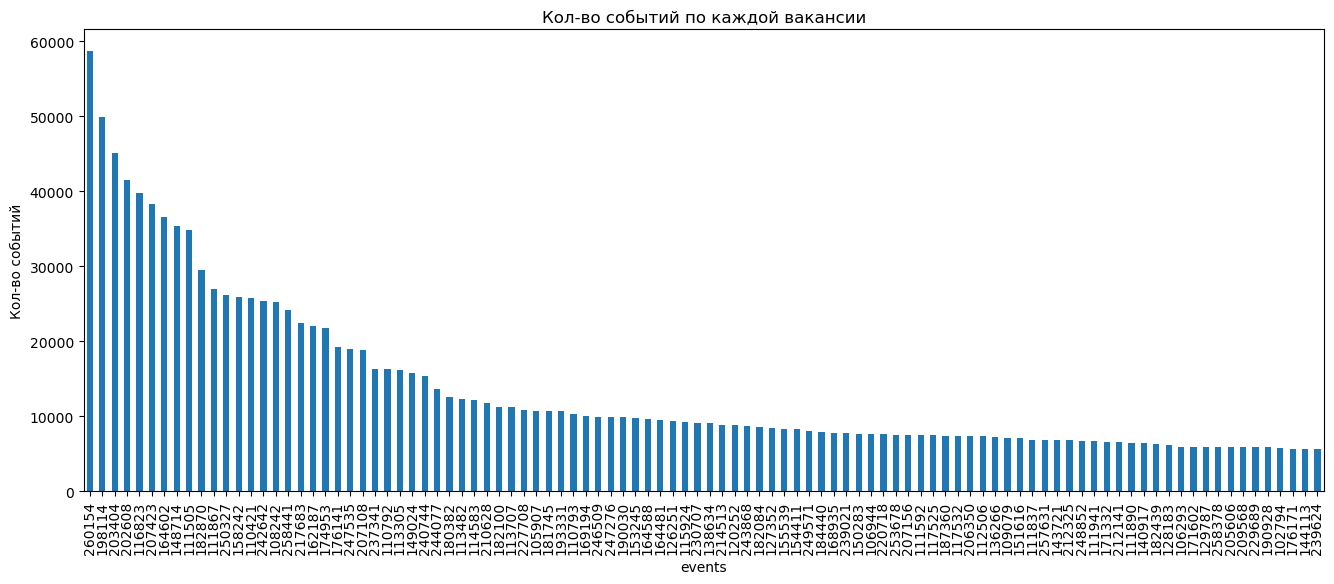

In [117]:
# Активность по вакансиям
vacancy_events = df['vacancy_id_'].value_counts()
#vacancy_events
vacancy_events[:100].plot(
    kind='bar',
   # color = 'blue',
   # bins=100,
    figsize=(16, 6),
    title='Кол-во событий по каждой вакансии',
    xlabel='events',
    ylabel='Кол-во событий',
   # grid = True,
);

<b>260154</b> - самая популярная вакансия, кол-во действий за рассматриваемый период - 58670. На втором месте вакансия <b>198114</b> -  49907, на третьем вакансия <b>203404</b> - 45195.

---------

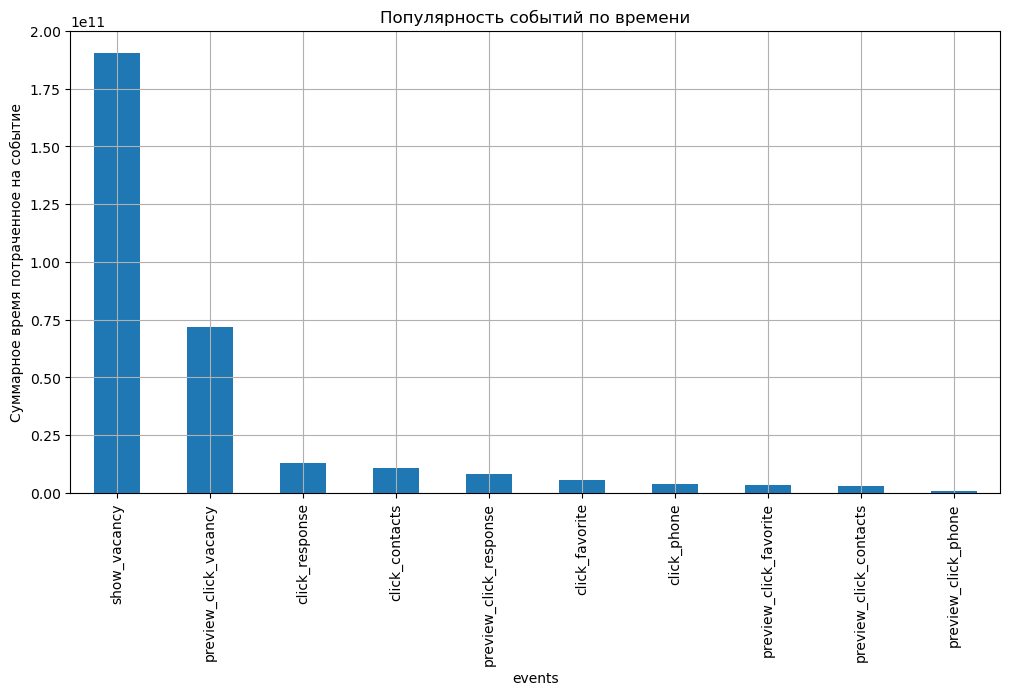

In [119]:
# Сколько времени потрачено на каждое событие
all_events_time = df.groupby(['event_type'])['action_time'].sum().sort_values(ascending=False)
all_events_time.plot(
    kind='bar',
   # color = 'blue',
   # bins=100,
    figsize=(12, 6),
    title='Популярность событий по времени',
    xlabel='events',
    ylabel='Суммарное время потраченное на событие',
    grid = True,
);

<b>show_vacancy</b> - самое популярное действие на сайте, более 190.5 млд. раз. На втором месте <b>preview_click_vacancy</b> более 71.6 млд. раз.

-------------------------

C:\Users\glebychgame\AppData\Local\Temp\ipykernel_21544\2143681644.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('event_date')['user_id', 'cookie_id'].nunique().plot(


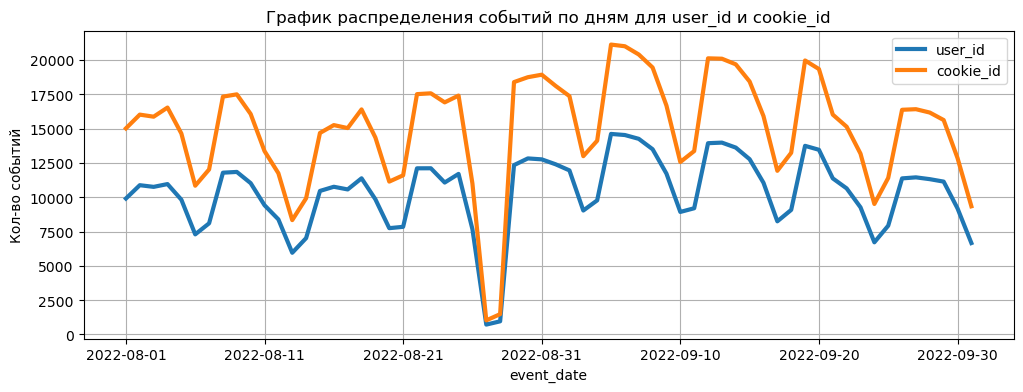

In [271]:
df.groupby('event_date')['user_id', 'cookie_id'].nunique().plot(
    kind='line',
    figsize=(12, 4),
   # x = ['nonrel_action_time'],
    title='График распределения событий по дням для user_id и cookie_id',
    #xlabel='Время потраченное на нецелевые действия, перед выбором вакансии, sec',
    ylabel='Кол-во событий',
    grid = True,
    lw=3
);
plt.legend(['user_id', 'cookie_id'])

In [273]:
df.groupby('event_date')['user_id', 'cookie_id'].nunique().sort_values(by = 'user_id')

C:\Users\glebychgame\AppData\Local\Temp\ipykernel_21544\3158644790.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('event_date')['user_id', 'cookie_id'].nunique().sort_values(by = 'user_id')


,user_id,cookie_id
event_date,,
2022-08-27,721,1028
2022-08-28,959,1482
2022-08-13,5954,8335
2022-10-01,6663,9342
2022-09-24,6718,9511
...,...,...
2022-09-12,13941,20126
2022-09-13,13983,20098
2022-09-07,14259,20407


- В субботу <b>2022-08-27</b> числа и в воскресенье <b>2022-08-28</b> числа наблюдается снижение активности на платформе, что говорит о каких-то проблемах.

## 1. Рейтинг топ-100 вакансий по количеству действий по каждой неделе

In [4]:
df.groupby(['event_date', 'vacancy_id_']).agg({'event_type': ['count']}).reset_index()

,event_date,vacancy_id_,event_type
,,,count
0,2022-08-01,100004,3
1,2022-08-01,100006,8
2,2022-08-01,100015,2
3,2022-08-01,100018,2
4,2022-08-01,100021,2
...,...,...,...
1717085,2022-10-01,260143,2
1717086,2022-10-01,260150,2
1717087,2022-10-01,260154,643


In [5]:
# Группируем данные по столбцу 'event_date' и подсчитываем кол-во действий с вакансией в этот день
rating = df.groupby(['event_date'])['vacancy_id_'].value_counts()
rating_df = pd.DataFrame(rating)

rating_df

vacancy_id_
event_date vacancy_id_             
2022-08-01 148714              1711
           108242              1696
           123270              1419
           258441              1272
           164602              1203
...                             ...
2022-10-01 259450                 1
           259610                 1
           259631                 1
           259655                 1
           260072                 1

[1717090 rows x 1 columns]

In [111]:
#rating

In [112]:
#rating_df.iloc[100000]

In [261]:

# Создаем новый столбец 'week' в который заносим номер недели

rating_df = rating_df.rename(columns={"vacancy_id_": "quantyti"})
rating_df = rating_df.reset_index()
#rating_df.index.name = "index"
rating_df['event_date'] = pd.to_datetime(rating_df['event_date'], errors ='coerce')
rating_df['week'] = rating_df['event_date'].dt.isocalendar().week
#rating_df


In [ ]:
# Группируем датасет rating_df по полям 'week' и 'vacancy_id_' и подсчитываем кол-во действий с каждой вакансией в течении
# каждой недели. Всего 9 недель в датасете. Сортипуем по убыванию 'quantyti'

rating3 = rating_df.groupby(['week', 'vacancy_id_'])['quantyti'].sum().sort_values(ascending=False)
rating3_df = pd.DataFrame(rating3).reset_index()
#rating3_df

In [113]:
#rating3_df[rating3_df['week'] == 37][:100]

In [11]:
# Формируем датасет ТОП 100 наибольшей активности по вакансиям на каждой неделе 
week_num = [32, 33, 34, 35, 36, 37, 38, 39]
df_week_top100 = rating3_df[rating3_df['week'] == 31][:100]
for i in week_num:
    
    df_week = rating3_df[rating3_df['week'] == i][:100]
    df_week_top100 = df_week_top100.append(df_week, ignore_index = True )

C:\Users\glebychgame\AppData\Local\Temp\ipykernel_21544\2412323244.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_week_top100 = df_week_top100.append(df_week, ignore_index = True )
C:\Users\glebychgame\AppData\Local\Temp\ipykernel_21544\2412323244.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_week_top100 = df_week_top100.append(df_week, ignore_index = True )
C:\Users\glebychgame\AppData\Local\Temp\ipykernel_21544\2412323244.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_week_top100 = df_week_top100.append(df_week, ignore_index = True )
C:\Users\glebychgame\AppData\Local\Temp\ipykernel_21544\2412323244.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

In [12]:
df_week_top100

,week,vacancy_id_,quantyti
0,31,148714,11055
1,31,113707,10117
2,31,260154,7447
3,31,258441,7440
4,31,153245,7191
...,...,...,...
895,39,236860,654
896,39,215913,640
897,39,237747,630
898,39,205010,630


In [13]:
#df_week_top100.to_parquet('week_top100.parquet',compression='BROTLI')

In [14]:
# В списоки сохраним вакансии последней и предпоследней недель

week38 = df_week_top100[df_week_top100['week'] == 38]['vacancy_id_']. tolist ()
week39 = df_week_top100[df_week_top100['week'] == 39]['vacancy_id_']. tolist ()
#week38

In [15]:
# Найдем пересечение вакансий из двух списков
list_vacancy = []
for i in week38:
    if i in week39:
        list_vacancy.append(i)
   

In [16]:
# 62 вакансии из ТОП 100 последней и предпоследней недель совпадают. 
len(list_vacancy)

62

### Совпадают 62 вакансии из ТОП-100 последней недели и ТОП-100 предпоследней недели 

---------------------------------

## 2. Количество вакансий, с которыми не было ни одного действия за последнюю неделю, 2 недели, 3 недели, 4 недели

In [18]:
# Список всех вакансий
all_vacancy = df['vacancy_id_']
all_vacancy = all_vacancy.drop_duplicates()
all_vacancy

0           153975
2           182445
6           174953
9           176171
11          137659
             ...  
12288391    256794
12291677    170777
12291708    185476
12291864    258908
12291919    233667
Name: vacancy_id_, Length: 159973, dtype: int64

In [19]:
# rating3_df - датасет со списками вакансий по неделям, кол-ом действий с этими вакансиями (от 1 до ...)
# Список вакансий за последнюю неделю
week_39 = rating3_df[rating3_df['week'] == 39]['vacancy_id_']. tolist ()
# Список вакансий за предпоследнюю неделю
week_38 = rating3_df[rating3_df['week'] == 38]['vacancy_id_']. tolist ()
# Список вакансий за 37 неделю
week_37 = rating3_df[rating3_df['week'] == 37]['vacancy_id_']. tolist ()
# Список вакансий за 36 неделю
week_36 = rating3_df[rating3_df['week'] == 36]['vacancy_id_']. tolist ()
print(f'last week = {len(week_39)}, week 38 = {len(week_38)}, week 37 = {len(week_37)}, week 36 = {len(week_36)}')

last week = 58340, week 38 = 66769, week 37 = 70402, week 36 = 71656


In [20]:
# Функция для поиска пересечений вакансий из двух списков
# чтобы выясеить со сколькими вакансиями не было никаках действий за последнюю неделю, 2, 3, 4
def list_intersection(week):
    lst = []
    for i in all_vacancy:
        if i not in week:
            lst.append(i)
    return lst

In [21]:
list_no_choosen_vacancy = {'last_week': 0, '2_last_weeks': 0, '3_last_weeks': 0, '4_last_weeks': 0}

In [22]:
list_no_choosen_vacancy['last_week'] = len(list_intersection(week_39))

In [23]:
list_no_choosen_vacancy['2_last_weeks'] = len(list_intersection(week_39 + week_38))

In [24]:
list_no_choosen_vacancy['3_last_weeks'] = len(list_intersection(week_39 + week_38 + week_37))

In [25]:
list_no_choosen_vacancy['4_last_weeks'] = len(list_intersection(week_39 + week_38 + week_37 + week_36))

In [26]:
list_no_choosen_vacancy

{'last_week': 101633,
 '2_last_weeks': 80775,
 '3_last_weeks': 64941,
 '4_last_weeks': 50233}

In [27]:
four_last_weeks = [101633, 80775, 64941, 50233]
lst_weeks = ['last_week', '2_last_weeks', '3_last_weeks', '4_last_weeks']

In [28]:
#four_last_weeks_df = pd.DataFrame(four_last_weeks, lst_weeks)
four_last_weeks_df = pd.DataFrame(list(list_no_choosen_vacancy.items()), columns=["x", "y"])

In [29]:
four_last_weeks_df

,x,y
0,last_week,101633
1,2_last_weeks,80775
2,3_last_weeks,64941
3,4_last_weeks,50233


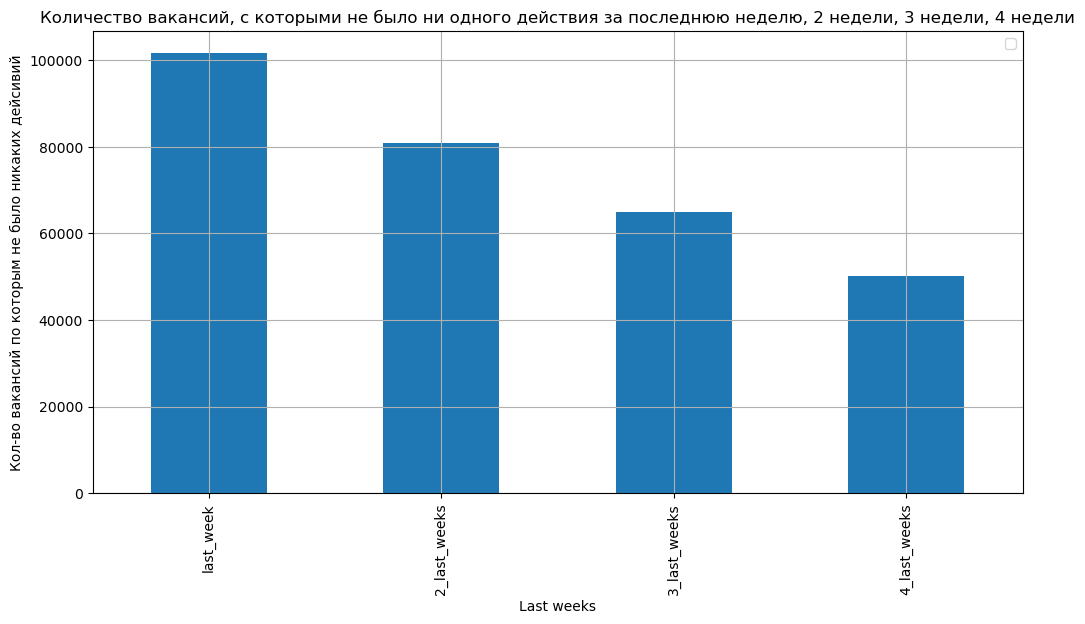

In [32]:
four_last_weeks_df.plot(
    kind='bar',
   # color = 'blue',
   # bins=100,
    x = 'x',
    y = 'y',
    figsize=(12, 6),
    title='Количество вакансий, с которыми не было ни одного действия за последнюю неделю, 2 недели, 3 недели, 4 недели',
    xlabel='Last weeks',
    ylabel='Кол-во вакансий по которым не было никаких дейсивий',
    grid = True,
);
plt.legend([])
plt.show()

In [33]:
### Вывести в виде 4 датасетов с id вакансий, для каждой из категорий (1, 2, 3, 4 недели)

In [34]:
list_no_choosen_vacancy_week_39 = list_intersection(week_39)

In [35]:
df_no_choosen_vacancy_week_39 = pd.DataFrame(list_no_choosen_vacancy_week_39, columns=['last_week'])
#df_no_choosen_vacancy_week_39
#df_no_choosen_vacancy_week_39.to_parquet('Data/no_choosen_vacancy_last_week.parquet',compression='BROTLI')

In [36]:
list_no_choosen_vacancy_week_39_38 = list_intersection(week_39 + week_38)

In [37]:
df_no_choosen_vacancy_week_39_38 = pd.DataFrame(list_no_choosen_vacancy_week_39_38, columns=['last_2week'])
#df_no_choosen_vacancy_week_39_38.to_parquet('Data/no_choosen_vacancy_last_2weeks.parquet',compression='BROTLI')
#df_no_choosen_vacancy_week_39_38

In [38]:
list_no_choosen_vacancy_week_39_38_37 = list_intersection(week_39 + week_38 + week_37)

In [39]:
df_no_choosen_vacancy_week_39_38_37 = pd.DataFrame(list_no_choosen_vacancy_week_39_38_37, columns=['last_3week'])
#df_no_choosen_vacancy_week_39_38_37.to_parquet('Data/no_choosen_vacancy_last_3weeks.parquet',compression='BROTLI')
#df_no_choosen_vacancy_week_39_38_37

In [40]:
list_no_choosen_vacancy_week_39_38_37_36 = list_intersection(week_39 + week_38 + week_37 + week_36)

In [41]:
df_no_choosen_vacancy_week_39_38_37_36 = pd.DataFrame(list_no_choosen_vacancy_week_39_38_37_36, columns=['last_4week'])
#df_no_choosen_vacancy_week_39_38_37_36.to_parquet('Data/no_choosen_vacancy_last_4weeks.parquet',compression='BROTLI')
#df_no_choosen_vacancy_week_39_38_37_36

## 3. Взять cookie_id из тестового датасета и по ним собрать датасет: из тренировочного датасета и получить для каждого тестового cookie_id дату последней активности.

In [42]:
# Грузим тестовый датосет
test_df = pd.read_parquet('Data/test_private_users_mfti.parquet')
test_df

,cookie_id
0,0018914ba3e54011b28fa715583d3354
1,0035c298d8c64f368ae730a9cca9bb20
2,00956458877448ec9fba87fb97443fdf
3,0099387c921b41e7bae6c99dd8254b60
4,009f65e8ae99413a8da94a491320580a
...,...
3081,ffadd195859444d2ade2479b0611c5c1
3082,ffbc08b528c64f22996873fc63872202
3083,ffdeaf3c34544529880aebf17c103f6c
3084,ffefa79a74804ee69e6c131e0d05b948


In [43]:
df['cookie_id'].nunique()

329408

In [44]:
# Объединяем (inner join) два датасета по полю 'cookie_id'
merged_test_train_cookie_df = df.merge(test_df, left_on=['cookie_id'], right_on=['cookie_id'])
merged_test_train_cookie_df

,common_id,event_date,event_timestamp,action_time,vacancy_id_,cookie_id,user_id,event_type,rating
0,123,2022-09-21,1663752696,0,251009,0018914ba3e54011b28fa715583d3354,None,preview_click_vacancy,0
1,123,2022-09-21,1663752696,47,251009,0018914ba3e54011b28fa715583d3354,None,show_vacancy,0
2,123,2022-09-21,1663752743,0,225765,0018914ba3e54011b28fa715583d3354,None,preview_click_vacancy,0
3,123,2022-09-21,1663752743,57,225765,0018914ba3e54011b28fa715583d3354,None,show_vacancy,0
4,123,2022-09-21,1663752800,11366,225765,0018914ba3e54011b28fa715583d3354,None,click_response,1
...,...,...,...,...,...,...,...,...,...
344375,367569,2022-08-11,1660210724,22,185446,fff0c04c0cd54c67bb5fd79ae7b1145b,8ecdbd1be53b467498f7384640be70e1,show_vacancy,0
344376,367569,2022-08-11,1660210746,30,152871,fff0c04c0cd54c67bb5fd79ae7b1145b,8ecdbd1be53b467498f7384640be70e1,show_vacancy,0
344377,367569,2022-08-11,1660210776,197,159236,fff0c04c0cd54c67bb5fd79ae7b1145b,8ecdbd1be53b467498f7384640be70e1,preview_click_vacancy,0
344378,367569,2022-08-11,1660210973,170,255497,fff0c04c0cd54c67bb5fd79ae7b1145b,8ecdbd1be53b467498f7384640be70e1,preview_click_vacancy,0


In [45]:
# Другой способ объединения двух датасетов
test_train_cookie_df = df[df['cookie_id'].isin(test_df['cookie_id'])]
test_train_cookie_df

,common_id,event_date,event_timestamp,action_time,vacancy_id_,cookie_id,user_id,event_type,rating
3745,123,2022-09-21,1663752696,0,251009,0018914ba3e54011b28fa715583d3354,None,preview_click_vacancy,0
3746,123,2022-09-21,1663752696,47,251009,0018914ba3e54011b28fa715583d3354,None,show_vacancy,0
3747,123,2022-09-21,1663752743,0,225765,0018914ba3e54011b28fa715583d3354,None,preview_click_vacancy,0
3748,123,2022-09-21,1663752743,57,225765,0018914ba3e54011b28fa715583d3354,None,show_vacancy,0
3749,123,2022-09-21,1663752800,11366,225765,0018914ba3e54011b28fa715583d3354,None,click_response,1
...,...,...,...,...,...,...,...,...,...
12290116,367569,2022-08-11,1660210724,22,185446,fff0c04c0cd54c67bb5fd79ae7b1145b,8ecdbd1be53b467498f7384640be70e1,show_vacancy,0
12290117,367569,2022-08-11,1660210746,30,152871,fff0c04c0cd54c67bb5fd79ae7b1145b,8ecdbd1be53b467498f7384640be70e1,show_vacancy,0
12290118,367569,2022-08-11,1660210776,197,159236,fff0c04c0cd54c67bb5fd79ae7b1145b,8ecdbd1be53b467498f7384640be70e1,preview_click_vacancy,0
12290119,367569,2022-08-11,1660210973,170,255497,fff0c04c0cd54c67bb5fd79ae7b1145b,8ecdbd1be53b467498f7384640be70e1,preview_click_vacancy,0


In [46]:
# Группипуем получившийся датасет по cookie_id где в поле 'event_date' вносим последнюю дату активности
test_train_cookie = test_train_cookie_df.groupby(['cookie_id'])['event_date'].max()
test_train_cookie_df2 = pd.DataFrame(test_train_cookie).reset_index()
test_train_cookie_df2

,cookie_id,event_date
0,0018914ba3e54011b28fa715583d3354,2022-09-24
1,0035c298d8c64f368ae730a9cca9bb20,2022-09-13
2,00956458877448ec9fba87fb97443fdf,2022-09-24
3,0099387c921b41e7bae6c99dd8254b60,2022-09-29
4,009f65e8ae99413a8da94a491320580a,2022-09-29
...,...,...
3081,ffadd195859444d2ade2479b0611c5c1,2022-09-02
3082,ffbc08b528c64f22996873fc63872202,2022-09-29
3083,ffdeaf3c34544529880aebf17c103f6c,2022-09-16
3084,ffefa79a74804ee69e6c131e0d05b948,2022-09-23


In [47]:
test_train_cookie

cookie_id
0018914ba3e54011b28fa715583d3354    2022-09-24
0035c298d8c64f368ae730a9cca9bb20    2022-09-13
00956458877448ec9fba87fb97443fdf    2022-09-24
0099387c921b41e7bae6c99dd8254b60    2022-09-29
009f65e8ae99413a8da94a491320580a    2022-09-29
                                       ...    
ffadd195859444d2ade2479b0611c5c1    2022-09-02
ffbc08b528c64f22996873fc63872202    2022-09-29
ffdeaf3c34544529880aebf17c103f6c    2022-09-16
ffefa79a74804ee69e6c131e0d05b948    2022-09-23
fff0c04c0cd54c67bb5fd79ae7b1145b    2022-08-11
Name: event_date, Length: 3086, dtype: object

In [48]:
#test_train_cookie_df2.to_parquet('test_train_cookie_last_day.parquet',compression='BROTLI')

## 4. График со временем, которое пользователь тратит на любое из нецелевых действий, прежде чем сделать целевое и количеством таких целевых действий для каждого времени

In [181]:
#Создаем список уникальных событий
qw = df['event_type'].value_counts()
events = qw.index.to_list()
events


['show_vacancy',
 'preview_click_vacancy',
 'click_response',
 'click_contacts',
 'preview_click_response',
 'click_favorite',
 'preview_click_favorite',
 'preview_click_contacts',
 'click_phone',
 'preview_click_phone']

In [182]:
features_events = ['show_vacancy', 'preview_click_vacancy', 'click_favorite', 'preview_click_favorite']
features_events

['show_vacancy',
 'preview_click_vacancy',
 'click_favorite',
 'preview_click_favorite']

In [183]:
# Целевые события
target_events = ['click_response', 'click_contacts', 'preview_click_response', 'preview_click_contacts',
                 'click_phone', 'preview_click_phone']
target_events

['click_response',
 'click_contacts',
 'preview_click_response',
 'preview_click_contacts',
 'click_phone',
 'preview_click_phone']

In [184]:
# df.groupby('common_id')['vacancy_id_'].apply(list)

In [185]:
# Скопируем в новый столюец 'not_target_event' нецелевые события
df['not_target_event'] = np.where(df['event_type'].isin(features_events), df['event_type'], 0)
# В новый столбец 'target_event' целевые события отметим 1, нецелевые 0
df['target_event'] = np.where(df['event_type'].isin(target_events), 1, 0)
# В столбец 'nonrel_action_time' скопируем время потраченное на нецелевые действия
df['nonrel_action_time'] = np.where(df['event_type'].isin(features_events), df['action_time'], 0)
df['rel_action_time'] = np.where(df['event_type'].isin(target_events), df['action_time'], 0)


df

,common_id,event_date,event_timestamp,action_time,vacancy_id_,cookie_id,user_id,event_type,rating,not_target_event,target_event,nonrel_action_time,rel_action_time
0,1,2022-08-30,1661866548,0,153975,0000c4548c3944c08972bbdc1fa4eb85,2eb30fab80244cdebbafd5ed096bc08f,preview_click_vacancy,0,preview_click_vacancy,0,0,0
1,1,2022-08-30,1661866548,11,153975,0000c4548c3944c08972bbdc1fa4eb85,2eb30fab80244cdebbafd5ed096bc08f,show_vacancy,0,show_vacancy,0,11,0
2,1,2022-08-30,1661866559,0,182445,0000c4548c3944c08972bbdc1fa4eb85,2eb30fab80244cdebbafd5ed096bc08f,show_vacancy,0,show_vacancy,0,0,0
3,1,2022-08-30,1661866559,5,182445,0000c4548c3944c08972bbdc1fa4eb85,2eb30fab80244cdebbafd5ed096bc08f,preview_click_vacancy,0,preview_click_vacancy,0,5,0
4,1,2022-08-30,1661866564,0,182445,0000c4548c3944c08972bbdc1fa4eb85,2eb30fab80244cdebbafd5ed096bc08f,show_vacancy,0,show_vacancy,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12292583,367641,2022-08-22,1661164755,0,160164,ffffdb17f45b4032b386d691d52e6c00,None,preview_click_vacancy,0,preview_click_vacancy,0,0,0
12292584,367641,2022-08-22,1661164755,791,160164,ffffdb17f45b4032b386d691d52e6c00,None,preview_click_contacts,1,0,1,0,791
12292585,367641,2022-08-22,1661165546,1,185412,ffffdb17f45b4032b386d691d52e6c00,None,preview_click_vacancy,0,preview_click_vacancy,0,1,0
12292586,367641,2022-08-22,1661165547,5,185412,ffffdb17f45b4032b386d691d52e6c00,None,show_vacancy,0,show_vacancy,0,5,0


In [186]:
# Создаем датафрейм со списками нецелевых действий пользователя по вакансиям
not_target = df.groupby(['common_id', 'vacancy_id_'])['not_target_event'].apply(list)
not_target_df = pd.DataFrame(not_target)
not_target_df

not_target_event
common_id vacancy_id_                                                   
1         137659                   [show_vacancy, preview_click_vacancy]
          153975                   [preview_click_vacancy, show_vacancy]
          174953       [preview_click_vacancy, show_vacancy, click_fa...
          176171                   [preview_click_vacancy, show_vacancy]
          182445       [show_vacancy, preview_click_vacancy, show_vac...
...                                                                  ...
367641    107125                [preview_click_vacancy, show_vacancy, 0]
          107893                              [preview_click_vacancy, 0]
          150843                              [preview_click_vacancy, 0]
          160164                              [preview_click_vacancy, 0]
          185412                [preview_click_vacancy, show_vacancy, 0]

[4696085 rows x 1 columns]

In [224]:
# Создаем датафрейм со списками целевых действий пользователя по вакансиям
target = df.groupby(['common_id', 'vacancy_id_'])['target_event'].apply(list)
target_df = pd.DataFrame(target)
target_df

target_event
common_id vacancy_id_              
1         137659             [0, 0]
          153975             [0, 0]
          174953          [0, 0, 0]
          176171             [0, 0]
          182445       [0, 0, 0, 0]
...                             ...
367641    107125          [0, 0, 1]
          107893             [0, 1]
          150843             [0, 1]
          160164             [0, 1]
          185412          [0, 0, 1]

[4696085 rows x 1 columns]

In [188]:
# Соединяем два датафрейма в один
merged_df = not_target_df.merge(target_df, left_on=['common_id', 'vacancy_id_'], right_on=['common_id', 'vacancy_id_'])
#merged_df

In [189]:
# Список нецелевых действий пользователя по вакансиям
df.groupby(['common_id', 'vacancy_id_'])['event_type'].apply(list)


common_id  vacancy_id_
1          137659                     [show_vacancy, preview_click_vacancy]
           153975                     [preview_click_vacancy, show_vacancy]
           174953         [preview_click_vacancy, show_vacancy, click_fa...
           176171                     [preview_click_vacancy, show_vacancy]
           182445         [show_vacancy, preview_click_vacancy, show_vac...
                                                ...                        
367641     107125         [preview_click_vacancy, show_vacancy, click_co...
           107893           [preview_click_vacancy, preview_click_contacts]
           150843           [preview_click_vacancy, preview_click_contacts]
           160164           [preview_click_vacancy, preview_click_contacts]
           185412         [preview_click_vacancy, show_vacancy, click_co...
Name: event_type, Length: 4696085, dtype: object

In [190]:
# Список со временем потраченным пользователем по вакансиям
df.groupby(['common_id', 'vacancy_id_'])['action_time'].sum()

common_id  vacancy_id_
1          137659            18
           153975            11
           174953            48
           176171             6
           182445            18
                          ...  
367641     107125         10228
           107893            94
           150843            40
           160164           791
           185412             6
Name: action_time, Length: 4696085, dtype: int32

In [191]:
# Датафрейм со временем потраченным пользователем на нецелеыве действмя по вакансиям
sec = df.groupby(['common_id', 'vacancy_id_'])['nonrel_action_time'].sum()
sec_df = pd.DataFrame(sec)
sec_df

nonrel_action_time
common_id vacancy_id_                    
1         137659                       18
          153975                       11
          174953                       48
          176171                        6
          182445                       18
...                                   ...
367641    107125                    10105
          107893                        0
          150843                        0
          160164                        0
          185412                        6

[4696085 rows x 1 columns]

In [225]:
# Датафрейм со временем потраченным пользователем на целеыве действмя по вакансиям
sec2 = df.groupby(['common_id', 'vacancy_id_'])['rel_action_time'].sum()
sec2_df = pd.DataFrame(sec2)
sec2_df

rel_action_time
common_id vacancy_id_                 
1         137659                     0
          153975                     0
          174953                     0
          176171                     0
          182445                     0
...                                ...
367641    107125                   123
          107893                    94
          150843                    40
          160164                   791
          185412                     0

[4696085 rows x 1 columns]

In [192]:
# Объединяем события и время потраченное на нецелеыве события по common_id и vacancy_id_
merged_df = merged_df.merge(sec_df, left_on=['common_id', 'vacancy_id_'], right_on=['common_id', 'vacancy_id_'])
#merged_df

In [226]:
# Объединяем события и время потраченное на целеыве события по common_id и vacancy_id_
merged_df = merged_df.merge(sec2_df, left_on=['common_id', 'vacancy_id_'], right_on=['common_id', 'vacancy_id_'])
merged_df

not_target_event  \
common_id vacancy_id_                                                      
1         137659                   [show_vacancy, preview_click_vacancy]   
          153975                   [preview_click_vacancy, show_vacancy]   
          174953       [preview_click_vacancy, show_vacancy, click_fa...   
          176171                   [preview_click_vacancy, show_vacancy]   
          182445       [show_vacancy, preview_click_vacancy, show_vac...   
...                                                                  ...   
367641    107125                [preview_click_vacancy, show_vacancy, 0]   
          107893                              [preview_click_vacancy, 0]   
          150843                              [preview_click_vacancy, 0]   
          160164                              [preview_click_vacancy, 0]   
          185412                [preview_click_vacancy, show_vacancy, 0]   

                       target_event  nonrel_action_time  rel_action_time  
common_id vacancy_id_                                                     
1         137659             [0, 0]                  18                0  
          153975             [0, 0]                  11                0  
          174953          [0, 0, 0]                  48                0  
          176171             [0, 0]                   6                0  
          182445       [0, 0, 0, 0]                  18                0  
...                             ...                 ...              ...  
367641    107125          [0, 0, 1]               10105              123  
          107893             [0, 1]                   0               94  
          150843             [0, 1]                   0               40  
          160164             [0, 1]                   0              791  
          185412          [0, 0, 1]                   6                0  

[4696085 rows x 4 columns]

In [193]:
merged_df.not_target_event

common_id  vacancy_id_
1          137659                     [show_vacancy, preview_click_vacancy]
           153975                     [preview_click_vacancy, show_vacancy]
           174953         [preview_click_vacancy, show_vacancy, click_fa...
           176171                     [preview_click_vacancy, show_vacancy]
           182445         [show_vacancy, preview_click_vacancy, show_vac...
                                                ...                        
367641     107125                  [preview_click_vacancy, show_vacancy, 0]
           107893                                [preview_click_vacancy, 0]
           150843                                [preview_click_vacancy, 0]
           160164                                [preview_click_vacancy, 0]
           185412                  [preview_click_vacancy, show_vacancy, 0]
Name: not_target_event, Length: 4696085, dtype: object

In [227]:
merged_df

not_target_event  \
common_id vacancy_id_                                                      
1         137659                   [show_vacancy, preview_click_vacancy]   
          153975                   [preview_click_vacancy, show_vacancy]   
          174953       [preview_click_vacancy, show_vacancy, click_fa...   
          176171                   [preview_click_vacancy, show_vacancy]   
          182445       [show_vacancy, preview_click_vacancy, show_vac...   
...                                                                  ...   
367641    107125                [preview_click_vacancy, show_vacancy, 0]   
          107893                              [preview_click_vacancy, 0]   
          150843                              [preview_click_vacancy, 0]   
          160164                              [preview_click_vacancy, 0]   
          185412                [preview_click_vacancy, show_vacancy, 0]   

                       target_event  nonrel_action_time  rel_action_time  
common_id vacancy_id_                                                     
1         137659             [0, 0]                  18                0  
          153975             [0, 0]                  11                0  
          174953          [0, 0, 0]                  48                0  
          176171             [0, 0]                   6                0  
          182445       [0, 0, 0, 0]                  18                0  
...                             ...                 ...              ...  
367641    107125          [0, 0, 1]               10105              123  
          107893             [0, 1]                   0               94  
          150843             [0, 1]                   0               40  
          160164             [0, 1]                   0              791  
          185412          [0, 0, 1]                   6                0  

[4696085 rows x 4 columns]

In [228]:
final_df = merged_df.copy()

In [217]:
#final_df

In [218]:
# Получаем список списков действий клиентов по вакансиям. 1 - целевое действие, 0 - нецелевае
llst = []
llst = final_df['target_event'].to_list()
#llst

In [219]:
# Собираем вектор по вакансиям 1 - хотя бы одно действие было целевае, 0 - действия нецелевые
target_lst = []
temp = 0
for i in llst:
    temp = 0
    for j in i:
        if j == 1:
            temp = 1
    target_lst.append(temp)

In [220]:
#target_lst

In [229]:
# Преобразуем в датафрейм
target_df = pd.DataFrame(target_lst, columns = ['target_event'])
target_df.index.name = "index"
#target_df

In [230]:
final_df['new'] = final_df.index
final_df

not_target_event  \
common_id vacancy_id_                                                      
1         137659                   [show_vacancy, preview_click_vacancy]   
          153975                   [preview_click_vacancy, show_vacancy]   
          174953       [preview_click_vacancy, show_vacancy, click_fa...   
          176171                   [preview_click_vacancy, show_vacancy]   
          182445       [show_vacancy, preview_click_vacancy, show_vac...   
...                                                                  ...   
367641    107125                [preview_click_vacancy, show_vacancy, 0]   
          107893                              [preview_click_vacancy, 0]   
          150843                              [preview_click_vacancy, 0]   
          160164                              [preview_click_vacancy, 0]   
          185412                [preview_click_vacancy, show_vacancy, 0]   

                       target_event  nonrel_action_time  rel_action_time  \
common_id vacancy_id_                                                      
1         137659             [0, 0]                  18                0   
          153975             [0, 0]                  11                0   
          174953          [0, 0, 0]                  48                0   
          176171             [0, 0]                   6                0   
          182445       [0, 0, 0, 0]                  18                0   
...                             ...                 ...              ...   
367641    107125          [0, 0, 1]               10105              123   
          107893             [0, 1]                   0               94   
          150843             [0, 1]                   0               40   
          160164             [0, 1]                   0              791   
          185412          [0, 0, 1]                   6                0   

                                    new  
common_id vacancy_id_                    
1         137659            (1, 137659)  
          153975            (1, 153975)  
          174953            (1, 174953)  
          176171            (1, 176171)  
          182445            (1, 182445)  
...                                 ...  
367641    107125       (367641, 107125)  
          107893       (367641, 107893)  
          150843       (367641, 150843)  
          160164       (367641, 160164)  
          185412       (367641, 185412)  

[4696085 rows x 5 columns]

In [231]:
final_df = final_df.reset_index()
final_df.index.name = "index"

# Добавляем к final_df датасет target_df
final_df = final_df.merge(target_df, left_on=['index'], right_on=['index'])
final_df

,common_id,vacancy_id_,not_target_event,target_event_x,nonrel_action_time,rel_action_time,new,target_event_y
index,,,,,,,,
0,1,137659,"[show_vacancy, preview_click_vacancy]","[0, 0]",18,0,"(1, 137659)",0
1,1,153975,"[preview_click_vacancy, show_vacancy]","[0, 0]",11,0,"(1, 153975)",0
2,1,174953,"[preview_click_vacancy, show_vacancy, click_fa...","[0, 0, 0]",48,0,"(1, 174953)",0
3,1,176171,"[preview_click_vacancy, show_vacancy]","[0, 0]",6,0,"(1, 176171)",0
4,1,182445,"[show_vacancy, preview_click_vacancy, show_vac...","[0, 0, 0, 0]",18,0,"(1, 182445)",0
...,...,...,...,...,...,...,...,...
4696080,367641,107125,"[preview_click_vacancy, show_vacancy, 0]","[0, 0, 1]",10105,123,"(367641, 107125)",1
4696081,367641,107893,"[preview_click_vacancy, 0]","[0, 1]",0,94,"(367641, 107893)",1
4696082,367641,150843,"[preview_click_vacancy, 0]","[0, 1]",0,40,"(367641, 150843)",1


In [204]:
#final_df.info()

In [205]:
final_df.nonrel_action_time.value_counts()

0          409983
1           79906
2           41860
22          33425
21          33194
            ...  
265035          1
527797          1
109061          1
1219708         1
202469          1
Name: nonrel_action_time, Length: 387456, dtype: int64

In [234]:
lsd2 = final_df.drop(columns = ['not_target_event', 'rel_action_time', 'common_id', 'vacancy_id_', 'new', 'target_event_x'])
#Группируем по времени которое было потрачено прежде чем произошло целевое событое 
lsd1 = lsd2.where(lsd2['target_event_y']==1).groupby(['nonrel_action_time']).count()
#Группируем по времени которое было потрачено, но целевое событое не произошло
lsd0 = lsd2.where(lsd2['target_event_y']==0).groupby(['nonrel_action_time']).count()

In [262]:
#lsd1[0:50]

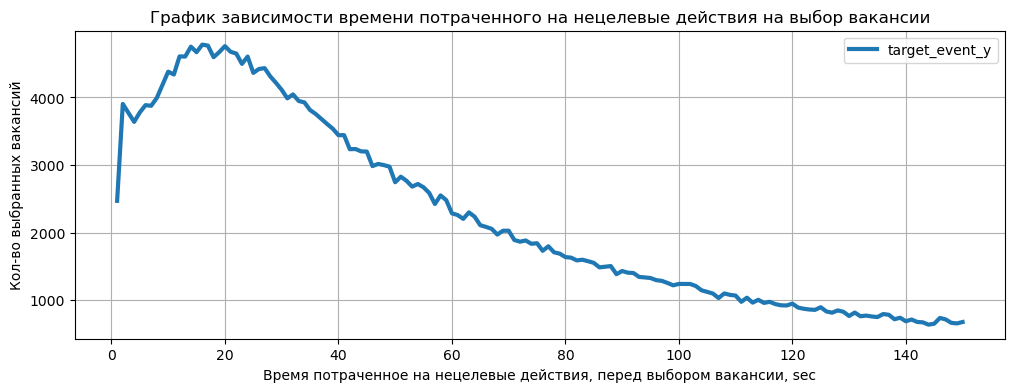

In [236]:
import matplotlib.pyplot as plt
lsd1[1:150].plot(
    kind='line',
    figsize=(12, 4),
    title='График зависимости времени потраченного на нецелевые действия на выбор вакансии',
    xlabel='Время потраченное на нецелевые действия, перед выбором вакансии, sec',
    ylabel='Кол-во выбранных вакансий',
    grid = True,
    lw=3
);

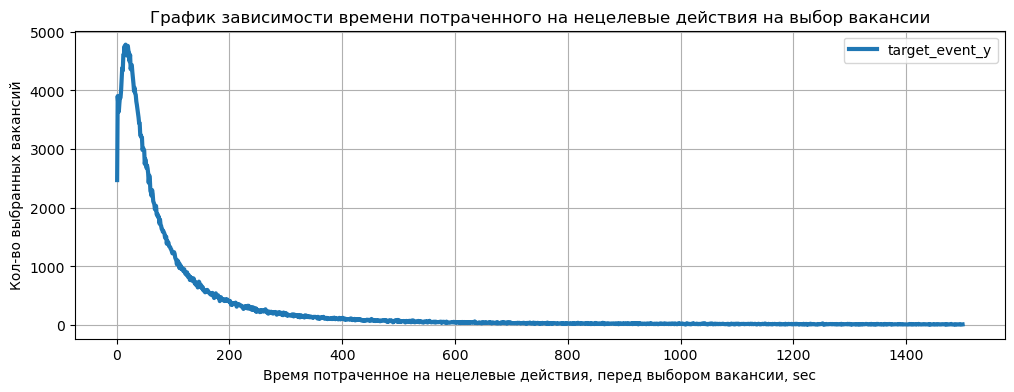

In [237]:
lsd1[1:1500].plot(
    kind='line',
    figsize=(12, 4),
    title='График зависимости времени потраченного на нецелевые действия на выбор вакансии',
    xlabel='Время потраченное на нецелевые действия, перед выбором вакансии, sec',
    ylabel='Кол-во выбранных вакансий',
    grid = True,
    lw=3
);

 --------------------------- 
  - <b>225721</b> раз пользователи выполнили целевое действие (выбрали вакансию) без предварительного просмотра, т.е. потратили 0 сек на предварительный просмотр. 
Далее наблюдается резкий провал до 2470 целевых действий, если пользователи тратили 1 сек на нецелевые действия, а потом количество целевых действий растет с ростом времени потраченного на просмотр вакансии. Локальный пик примерно 4800 целевых действий в районе 18 - 20 сек. В дальнейшем, чем больше пользователь тратит времени на нецелевые действия, тем меньше шанс, что будет сделан выбор. После 500 сек кол-во целевых действий стремится к 1. 



----------------------

## 5. График со временем, которое пользователь тратит на любое из нецелевых действий, прежде чем сделать целевое и количеством таких целевых действий для каждого времени для случаев, когда целевое действие следует за 'show_vacancy'

In [248]:
# 
show_vacancy_df = final_df[final_df['target_event_y'] == 1]
#show_vacancy_df

In [239]:
sv_lst = ['show_vacancy', ]

show_vacancy_df['show_vacancy'] = show_vacancy_df.apply(lambda x :(1 if ('show_vacancy' in x['not_target_event']) & (0 in x['not_target_event'])  else 0) , axis=1)

C:\Users\glebychgame\AppData\Local\Temp\ipykernel_21544\2736226264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_vacancy_df['show_vacancy'] = show_vacancy_df.apply(lambda x :(1 if ('show_vacancy' in x['not_target_event']) & (0 in x['not_target_event'])  else 0) , axis=1)


In [240]:
show_vacancy_df = show_vacancy_df[show_vacancy_df['show_vacancy'] == 1]
#show_vacancy_df

In [241]:
lsd1

,target_event_y
nonrel_action_time,
0.0,225721
1.0,2470
2.0,3904
3.0,3770
4.0,3639
...,...
4967793.0,1
4990807.0,1
5011975.0,1


In [246]:
final_df = final_df.drop(columns=['target_event_x', 'new'])
final_df[25:100]

,common_id,vacancy_id_,not_target_event,nonrel_action_time,rel_action_time,target_event_y
index,,,,,,
25,3,251362,"[preview_click_vacancy, show_vacancy, 0, show_...",381,17,1
26,4,135961,[show_vacancy],102,0,0
27,4,138502,[show_vacancy],31,0,0
28,4,138688,"[show_vacancy, 0, show_vacancy, show_vacancy]",107,3,1
29,4,209629,"[preview_click_vacancy, show_vacancy]",572002,0,0
...,...,...,...,...,...,...
95,8,256310,"[preview_click_vacancy, show_vacancy]",71,0,0
96,8,260154,"[preview_click_vacancy, show_vacancy]",381,0,0
97,9,129498,"[preview_click_vacancy, show_vacancy]",118,0,0


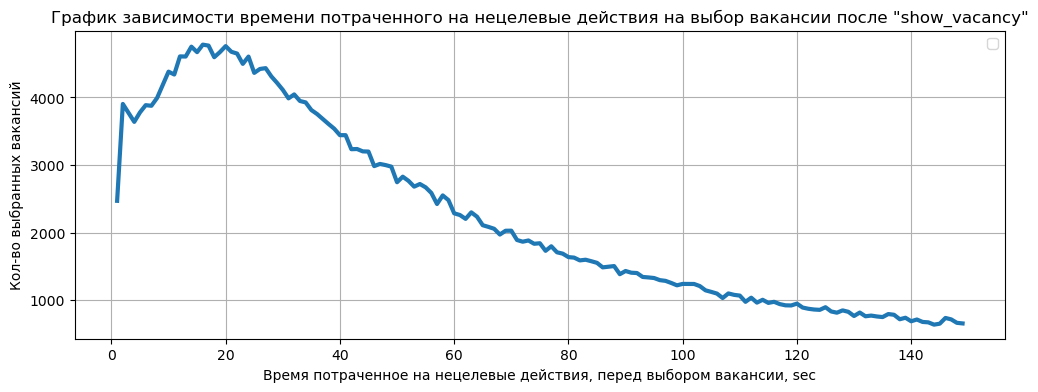

In [253]:
show_vacancy2 = show_vacancy_df.drop(columns = ['target_event_y', 'not_target_event', 'common_id', 'vacancy_id_'])
#Группируем по времени которое было потрачено прежде чем произошло целевое событое 
show_vacancy1 = show_vacancy2.groupby(['nonrel_action_time']).count()
import matplotlib.pyplot as plt
show_vacancy1[1:150].plot(
    kind='line',
    figsize=(12, 4),
   # x = ['nonrel_action_time'],
    title='График зависимости времени потраченного на нецелевые действия на выбор вакансии после "show_vacancy"',
    xlabel='Время потраченное на нецелевые действия, перед выбором вакансии, sec',
    ylabel='Кол-во выбранных вакансий',
    grid = True,
    lw=3
);
plt.legend([])

In [152]:
show_vacancy1.head(20).T

nonrel_action_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
show_vacancy,2678,1794,3071,2994,2903,3105,3310,3377,3555,3811,4024,4021,4295,4327,4488,4397,4536,4531,4377,4430


## Aналогичный график с распределением времени для каждого из целевых действий

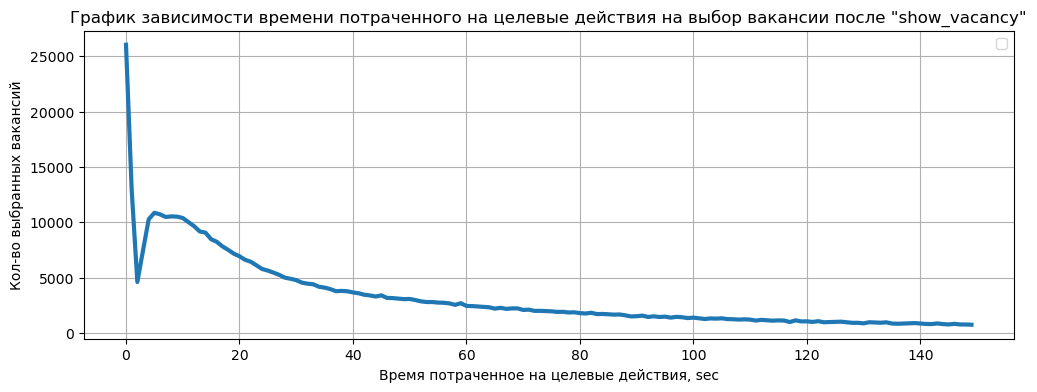

In [260]:
#Группируем по времени которое было потрачено прежде чем произошло целевое событое 
show_vacancy3 = show_vacancy2.groupby(['rel_action_time']).count()
import matplotlib.pyplot as plt
show_vacancy3[0:150].plot(
    kind='line',
    figsize=(12, 4),
   # x = ['nonrel_action_time'],
    title='График зависимости времени потраченного на целевые действия на выбор вакансии после "show_vacancy"',
    xlabel='Время потраченное на целевые действия, sec',
    ylabel='Кол-во выбранных вакансий',
    grid = True,
    lw=3
);
plt.legend([])

## 6. Зависимость выбора вакансиям от времени потраченного на нецелевые действия

In [154]:
final_df.groupby(['vacancy_id_'])['nonrel_action_time'].sum().sort_values(ascending=False)

vacancy_id_
260154    1812888746
110421    1138892958
148714     930109973
116823     917891620
202608     845442681
             ...    
190199             0
238915             0
190198             0
238912             0
154692             0
Name: nonrel_action_time, Length: 159973, dtype: int32


<b>260154</b> - самая популярная вакансия по времени нецелевых действий - 1812888746 сек. На втором месте вакансия <b>110421</b> - 1138892958, на третьем вакансия <b>148714</b> - 930109973.

--------------

In [93]:
# Сколько раз выбрали вакансию

cf = final_df.where(final_df['target_event_y']==1).groupby(['vacancy_id_'])['target_event_y'].count().sort_values(ascending=False)
cf_df = pd.DataFrame(cf)
cf_df

,target_event_y
vacancy_id_,
116823.0,5033
207423.0,3876
182870.0,3653
198114.0,3256
174953.0,3102
...,...
205661.0,1
162400.0,1
162399.0,1


In [160]:
# Сколько всего времени потрачено на выбранные вакансии
ctime = final_df.where(final_df['target_event_y']==1).groupby(['vacancy_id_'])['nonrel_action_time'].sum().sort_values(ascending=False)
ctime_df = pd.DataFrame(ctime)
# Создадим колонку в которой введем нормадизованние время, чтобы посмотреть на графике
ctime_df['norm_action_time'] = ctime_df.nonrel_action_time / 36000 
ctime_df

,nonrel_action_time,norm_action_time
vacancy_id_,,
116823.0,317090380.0,8808.066111
110421.0,194434203.0,5400.950083
260154.0,187686344.0,5213.509556
182870.0,170475906.0,4735.441833
198114.0,139100801.0,3863.911139
...,...,...
198319.0,0.0,0.000000
133123.0,0.0,0.000000
133125.0,0.0,0.000000


In [161]:
# Добавим к датафрейму cf_df_merge кобонку target_event_y
cf_df_merge = cf_df.merge(ctime_df, left_on=['vacancy_id_'], right_on=['vacancy_id_'])
cf_df_merge = cf_df_merge.reset_index()
cf_df_merge.index.name = "index"
cf_df_merge['vacancy_id_'] = cf_df_merge['vacancy_id_'].astype(int)
cf_df_merge

,vacancy_id_,target_event_y,nonrel_action_time,norm_action_time
index,,,,
0,116823,5033,317090380.0,8808.066111
1,207423,3876,92513154.0,2569.809833
2,182870,3653,170475906.0,4735.441833
3,198114,3256,139100801.0,3863.911139
4,174953,3102,132717615.0,3686.600417
...,...,...,...,...
120590,205661,1,0.0,0.000000
120591,162400,1,0.0,0.000000
120592,162399,1,16.0,0.000444


In [162]:
#cf_df_merge.info()

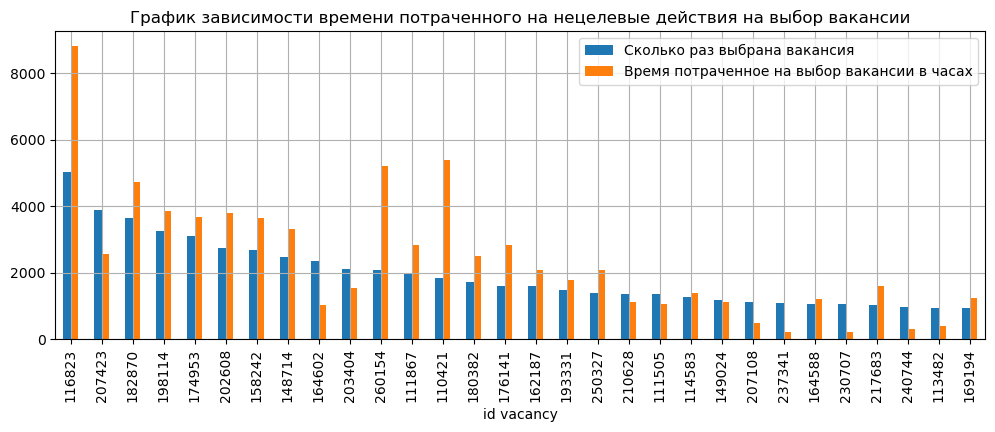

In [165]:
test_df = cf_df_merge.nlargest(30, ['target_event_y'])
test_df.plot(
    kind='bar',
    figsize=(12, 4),
    title='График зависимости времени потраченного на нецелевые действия на выбор вакансии',
    x = 'vacancy_id_',
    y = ['target_event_y', 'norm_action_time'],
    grid = True,
    lw=3
)
plt.legend(['Сколько раз выбрана вакансия', 'Время потраченное на выбор вакансии в часах'])
plt.xlabel('id vacancy')
plt.ylabel('')
plt.show()

In [166]:
cf_df_merge.describe()

,vacancy_id_,target_event_y,nonrel_action_time,norm_action_time
count,120595.000000,120595.000000,1.205950e+05,120595.000000
mean,180345.200904,6.094059,2.013786e+05,5.593851
std,45733.991607,39.088597,1.929352e+06,53.593121
min,100001.000000,1.000000,0.000000e+00,0.000000
25%,141490.500000,1.000000,1.000000e+00,0.000028
50%,180744.000000,2.000000,1.430000e+02,0.003972
75%,219199.500000,5.000000,1.057950e+04,0.293875
max,260167.000000,5033.000000,3.170904e+08,8808.066111


<AxesSubplot:>

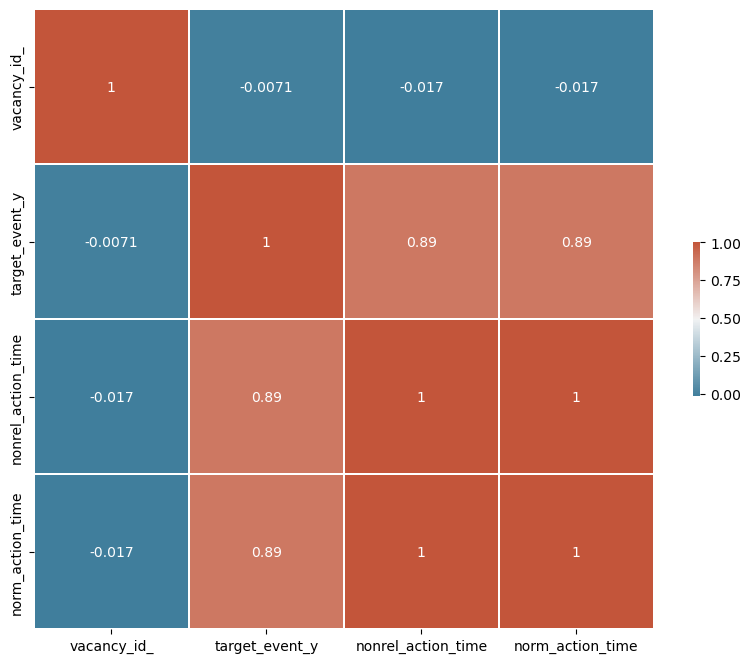

In [164]:
import seaborn as sns
cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig = plt.figure(figsize=(10, 10))
sns.heatmap(
    cf_df_merge.corr(),  annot=True, cmap=cmap,
    square=True, linewidths=.2, cbar_kws={"shrink": .2}
)

Наблюдается корреляция целевых действий и времени потраченного на нецелевые действия.


--------------------------

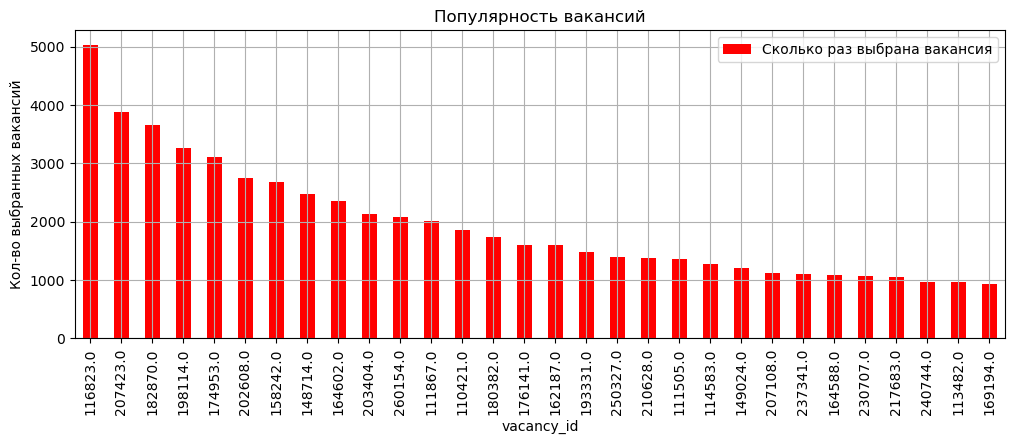

In [100]:
grouped_cf_df = cf_df.nlargest(30, ['target_event_y'])
grouped_cf_df.plot(
    kind='bar',
    color = 'red',
   # bins=100,
    figsize=(12, 4),
    title='Популярность вакансий',
    xlabel='vacancy_id',
    ylabel='Кол-во выбранных вакансий',
    grid = True,
);
plt.legend(['Сколько раз выбрана вакансия'])

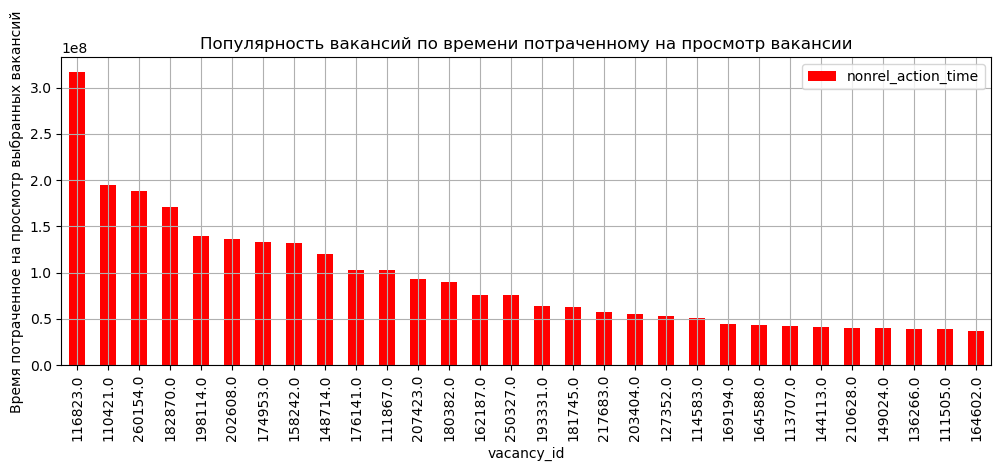

In [101]:
grouped_ctime_df = ctime_df.nlargest(30, ['nonrel_action_time'])
grouped_ctime_df = grouped_ctime_df.drop(columns=['norm_action_time'])
grouped_ctime_df.plot(
    kind='bar',
    color = 'red',
   # bins=100,
    figsize=(12, 4),
    title='Популярность вакансий по времени потраченному на просмотр вакансии',
    xlabel='vacancy_id',
    ylabel='Время потраченное на просмотр выбранных вакансий',
    grid = True,
);

In [102]:
final_df.groupby(['vacancy_id_'])['target_event_y'].count().sort_values(ascending=False)[0:100]

C:\Users\glebychgame\AppData\Local\Temp\ipykernel_21544\1997564640.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  final_df.groupby(['vacancy_id_'])['target_event_y'].count().sort_values(ascending=False)[0:100]


vacancy_id_
260154    18958
198114    17088
203404    16436
111505    15153
202608    14786
          ...  
154423     2370
187662     2338
221108     2331
197930     2327
176131     2319
Name: target_event_y, Length: 100, dtype: int64

In [103]:
grouped_ctime_df

,nonrel_action_time
vacancy_id_,
116823.0,317090380.0
110421.0,194434203.0
260154.0,187686344.0
182870.0,170475906.0
198114.0,139100801.0
202608.0,136228664.0
174953.0,132717615.0
158242.0,131499072.0
148714.0,119599579.0


## 7. Количество уникальных пользователей, целевых и нецелевых действий по дням недели. и доля целевых действий в общем количестве действий по дням недели

In [104]:
# Создаем новый столбец 'day_of_week' в который заносим день недели

df['event_date'] = pd.to_datetime(df['event_date'])
df['day_of_week'] = df['event_date'].dt.day_name()

# Группируем по дням недели
day_of_week_events = df.groupby(['day_of_week'])['target_event'].value_counts()

In [105]:
day_of_week_events = day_of_week_events.to_frame (name='values')
day_of_week_events = day_of_week_events.loc[[(   'Monday', 0),(   'Monday', 1),
           (  'Tuesday', 0),(  'Tuesday', 1),
           ('Wednesday', 0),('Wednesday', 1),
           ( 'Thursday', 0),( 'Thursday', 1),
           (   'Friday', 0),(   'Friday', 1),
           ( 'Saturday', 0),( 'Saturday', 1),
           (   'Sunday', 0),(   'Sunday', 1),]]
day_of_week_events

values
day_of_week target_event         
Monday      0             1967881
            1              172363
Tuesday     0             1970078
            1              188490
Wednesday   0             1872671
            1              176851
Thursday    0             1789601
            1              173834
Friday      0             1478244
            1              145716
Saturday    0             1043309
            1               87587
Sunday      0             1053408
            1               92835

In [114]:
day_of_week_events = day_of_week_events.reset_index()
day_of_week_events.index.name = "index"
#day_of_week_events

In [108]:
day_of_week_events['all_events'] = 0
day_of_week_events['percent_of_events'] = 0

# Заносим в столбец 'all_events' сумму всех событий по дням недели,
# а в столбец 'percent_of_events' долю целевых и добю нецелевых действий

for i, row in day_of_week_events.iterrows():
    if i % 2 == 0:
        a = day_of_week_events.iloc[[i], [2]].values[0][0] + day_of_week_events.iloc[[i+1], [2]].values[0][0]
        day_of_week_events.iloc[[i], [3]] = a
        day_of_week_events.iloc[[i], [4]] = day_of_week_events.iloc[[i], [2]].values[0][0] / a * 100
    else:
        day_of_week_events.iloc[[i], [3]] = a
        day_of_week_events.iloc[[i], [4]] = day_of_week_events.iloc[[i], [2]].values[0][0] / a * 100

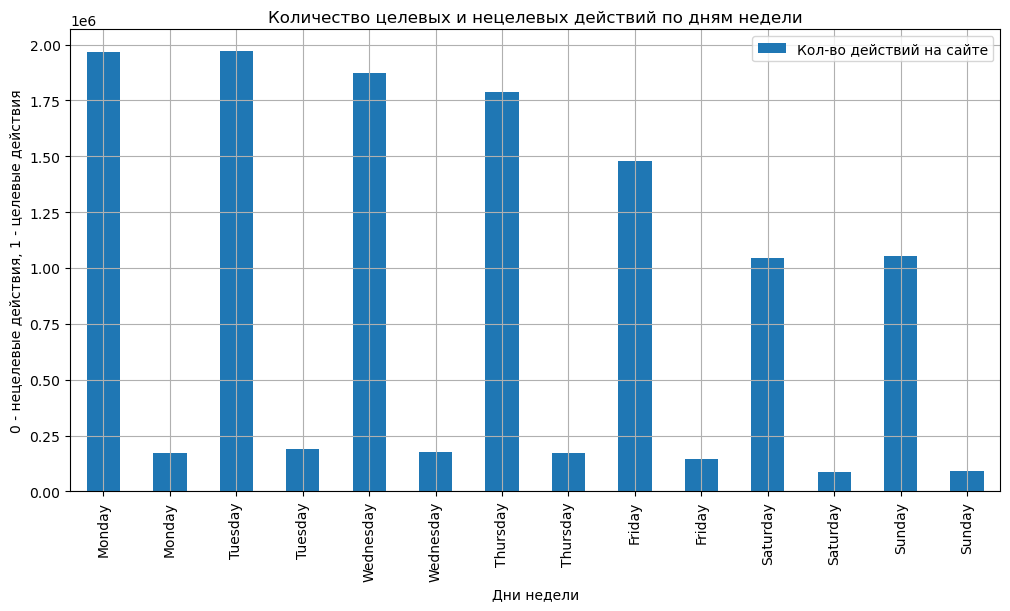

In [109]:
#test_df = cf_df_merge.nlargest(30, ['target_event_y'])
day_of_week_events.plot(
    kind='bar',
    figsize=(12, 6),
    title='Количество целевых и нецелевых действий по дням недели',
    y = ['values'],
    x = 'day_of_week',
    grid = True,
    lw=3
)
plt.legend(['Кол-во действий на сайте', 'Процент от всех действий'])
plt.xlabel('Дни недели')
plt.ylabel('0 - нецелевые действия, 1 - целевые действия')
plt.xticks = 'percent_of_events'
plt.show()

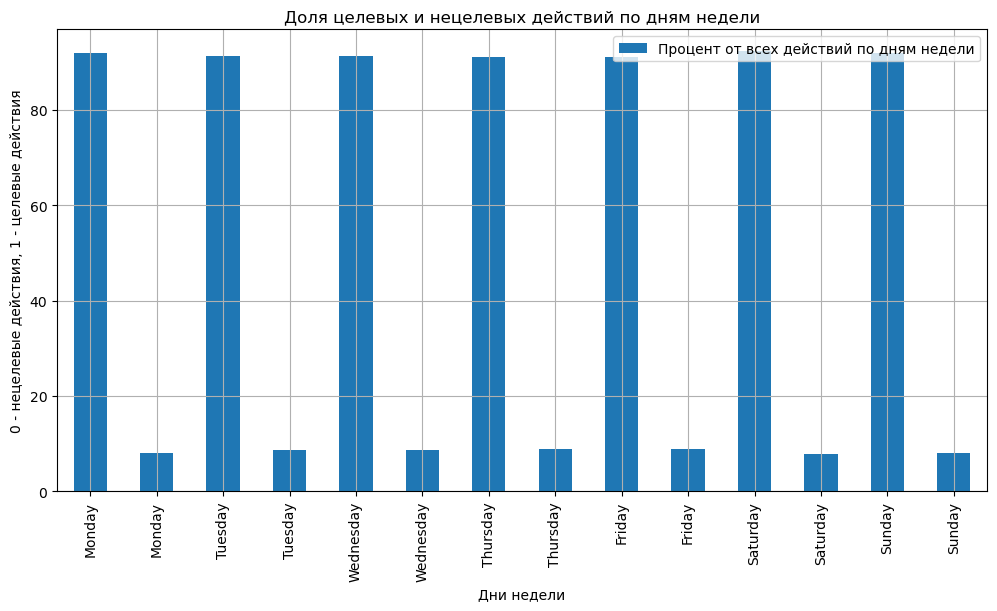

In [110]:
day_of_week_events.plot(
    kind='bar',
    figsize=(12, 6),
    title='Доля целевых и нецелевых действий по дням недели',
    y = ['percent_of_events'],
    x = 'day_of_week',
    grid = True,
    lw=3
)
plt.legend(['Процент от всех действий по дням недели'])
plt.xlabel('Дни недели')
plt.ylabel('0 - нецелевые действия, 1 - целевые действия')
plt.xticks = 'percent_of_events'
plt.show()